In [ ]:
pip install -r requirements.txt

In [12]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import bqplot
import contextily as ctx
import ipywidgets
from bqplot import pyplot as bqplt

In [2]:
#importing data from a csv file into a dataframe
led = pd.read_csv('Life Expectancy Data.csv',na_values={'HepatitisB':0,
                                 'Totalexpenditure':0,
                                'GDP':0,
                                'Population':0,
                                 'Alcohol':0,
                                 'Incomecompositionofresources':0,
                                  'Schooling':0    })

In [3]:
led

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
led = led.dropna() #dropping entirely NA values from the dataset
led

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
led.drop_duplicates() #dropping true duplicates if any from the dataframe

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [7]:
led.columns = led.columns.str.replace(' ', '') #removing white spaces from column names

Basic Plots

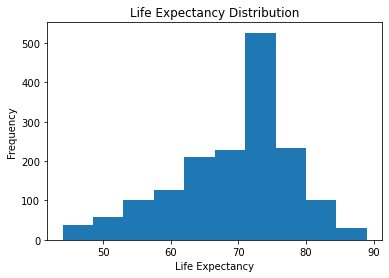

In [8]:
# plotting a life expectancy distribution graph
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.title("Life Expectancy Distribution")
plt.hist(led['Lifeexpectancy'])
plt.show()

## Final Dashboard

All three plots are linked to the dropdown option where we can filter on the country names. Plot 2 and Plot 3 are linked to plot 1. A subset corresponding to the highlighted data in plot 1 is displayed plots 2 and 3.
 
 For interactivity:
 1. Click on plot 1. 
 2. Then scroll up or down to expand or narrow down the highlighted subset of data. 
 3. Double click to lock and select the highlighted area. This would display the filtered data in the other two plots

In [9]:
#finding out the unique country names so that we can populate them in the dropdown options
country_name = led['Country'].unique()

In [15]:
#adding a title to the dashboard
myLabel=ipywidgets.HTML("<h1>Life Expectancy Prediction Analytics Dashboard</h1>", 
                        layout=ipywidgets.Layout(height='auto',display="flex",justify_content="center"))
#ipywidgets.Label(value='Analysis', layout=ipywidgets.Layout(width='500px'))


# create a dropdown menu for country
dropdown = ipywidgets.Dropdown(description='Select a Country', options=country_name)
dropdown.style.description_width = '500px'
dropdown.style.description_width = 'initial'
x_sc = bqplot.LinearScale()


# create figure for plotting Alcohol consumption
country_selected = dropdown.value
fig_title_alc = 'Alcohol consumption Rate' # string template for title of the figure 
#Scales
x_sc_line = bqplot.LinearScale()
y_sc_line = bqplot.LinearScale()
#Axis
ax_x = bqplot.axes.Axis(scale = x_sc_line,tick_rotate=60,label='Year',tick_style={'font-size': 10})
ax_y = bqplot.axes.Axis(scale = y_sc_line,orientation='vertical',label='Alcohol Consumption')
#Plot
line_alcohol = bqplt.plot(x=led[led['Country']==led['Country'][0]]['Year'],
                          y=led[led['Country']==led['Country'][0]]['Alcohol'],scales ={'x':x_sc_line,'y':y_sc_line},
                          padding=0.5)
#Figure
fig2 = bqplt.figure(marks=[line_alcohol],axes=[ax_x,ax_y],title=fig_title_alc
                    ,background_style = {"fill":"lightyellow"})
fig2.layout.width = '350px'



#creating a line chart for Life expectancy
#Scales
x_sc_life = bqplot.LinearScale()
y_sc_life = bqplot.LinearScale()
#Axis
ax_x_life = bqplot.axes.Axis(scale = x_sc_life,tick_rotate=60,label='Year',tick_style={'font-size': 10})
ax_y_life = bqplot.axes.Axis(scale = y_sc_life,orientation='vertical',label='Life Expectancy')
#Title
fig_title_tmpl = 'Life Expectancy Rate' # string template for title of the figure 
fig3 = bqplt.figure(title=fig_title_tmpl)
#Plot
line_life = bqplt.plot(led[led['Country']==led['Country'][0]]['Year'],
                       led[led['Country']==led['Country'][0]]['Lifeexpectancy'],scales ={'x':x_sc_life,'y':y_sc_life},
                          padding=0.5)
#Figure
fig3 = bqplt.figure(marks=[line_life],title=fig_title_tmpl,axes=[ax_x_life,ax_y_life]
                   ,background_style = {"fill":"lightyellow"})
fig3.layout.width = '400px'
#Adding interactivity of highlighting a portion of the plot while hovering over the graph
intsel = bqplot.interacts.FastIntervalSelector(marks=[line_life], scale=line_life.scales['x'])
fig3.interaction =intsel


#creating a bar chart for GDP
fig_title_tmpl2 = 'GDP Rate' # string template for title of the figure 
#Figure
fig4 = bqplt.figure(title=fig_title_tmpl2,background_style = {"fill":"lightyellow"})
fig4.layout.width = '500px'
#Plot
bar_GDP = bqplt.bar(led[led['Country']==led['Country'][0]]['Year'],led[led['Country']==led['Country'][0]]['GDP'])
#Labels
bqplt.xlabel('Year')
bqplt.ylabel('GDP')


#create a callback which updates the plot when dropdown item is selected
def update_plot(*args):
    country_selected = dropdown.value
    
    # update the y and x attribute of the mark by selecting the column from the led data frame
    line_alcohol.y = led[led['Country']==country_selected]['Alcohol']
    line_alcohol.x = led[led['Country']==country_selected]['Year']
     
    #for second figure
    line_life.y = led[(led['Country']==country_selected)]['Lifeexpectancy']
    line_life.x = led[(led['Country']==country_selected)]['Year']
    
    #for third figure
    bar_GDP.y = led[led['Country']==country_selected]['GDP']
    bar_GDP.x = led[led['Country']==country_selected]['Year']
  
    
#create a callback for adding the highlight interactivity in first graph
def select_plot(*args):
    #moving the entire code into try except block, so that highlight interactivity logic works correctly
    try:
        #filtering data based on country selected
        dropdown.observe(update_plot, 'value')
        country_selected = dropdown.value
        
       #filtering the years which are highlighted in figure 1 in figure 2.
        line_alcohol.y = led[(led['Country']==country_selected)]['Alcohol']
        line_alcohol.x = led[(led['Country']==country_selected) & 
                             (led['Year'].between(intsel.selected[0],intsel.selected[1]))]['Year']
        
        #filtering the years which are highlighted in figure 1 in figure 3.
        bar_GDP.y = led[led['Country']==country_selected]['GDP']
        bar_GDP.x = led[(led['Country']==country_selected)&
                        (led['Year'].between(intsel.selected[0],intsel.selected[1]))]['Year']

    except TypeError:
        pass

#register the callbacks by using the 'observe' method
dropdown.observe(update_plot, 'value')
line_life.observe(select_plot, 'selected')

#Placing the figures on Dashboard
#place the figures horizontally
figures = ipywidgets.HBox([fig3,fig2,fig4])
# stack the dropdown and fig widgets using VBox
ipywidgets.VBox([myLabel,dropdown, figures])